<h1 style="text-align:center">Travail pratique numérique en thermodynamique statistique</h1>
<h2 style="text-align:center">PARTIE 2 : Modèle de Drude</h2>
<hr>
<br><br>

**Membres de l'équipe**
| Nom | NI |
| --- | :---: |
| Maxime Tousignant-Tremblay | 536 772 369 |
| Philippe Morin | 536 776 382 |
| Alyx Olivier| 536 772 782 |
| Anna-Kim Péron| 536 852 157 |

# Introduction # 
Cette deuxième partie du travail implémente une simulation 2D du modèle de Drude pour décrire le mouvement des électrons libres et indépendants dans les métaux. Des sphères dures sont encore utilisées pour représenter les particules, mais maintenant de deux types différents afin de différencier les coeurs ioniques immobiles des électrons sur leurs trajectoires balistiques. Les collisions entre les deux doivent donc être inélastiques. Les questions sur cette simulation, d'abord de cinétique puis de dynamique des électrons en présence d'une force externe appliquée au cristal, vérifieront quelques résultats analytiques du modèle de Drude obtenus en classe et/ou dans le manuel de cours Ashcroft/Mermin.

- **La remise du présent _Jupyter Notebook_ ET celui de la 1<sup>re</sup> partie, ainsi que tout autre fichier de code produit, se fait sur Gradescope en n'oubliant pas d'y indiquer tous les membres de votre équipe.**

# 2<sup>e</sup> partie - Modèle de Drude #

Faites une copie du script `TDS-2Dsimulation_HXX.py` et modifiez-le pour obtenir une simulation cinétique d'un gaz d'électrons libres dans la matière cristalline selon le modèle de Drude. Spécifiquement selon les pp.4-6 du manuel Ashcroft/Mermin,
1. ajoutez un deuxième type de sphères fixes réparties périodiquement dans la boîte d'animation: celles-ci représenteront les coeurs ioniques,
2. éliminez les collisions entre les sphères mobiles qui représentent maintenant les électrons de conduction indépendants et libres,
3. en faisant appel à la température du gaz, ajoutez des collisions inélastiques entre les électrons libres et les coeurs ioniques fixes. La quantité de mouvement $\vec{p}$ n'est alors PAS conservée et il faut appliquer les hypothèses spécifiques du modèle de Drude à la sortie de chaque collision, notamment: 
- la direction de $\vec{p}$ doit être aléatoire,
- la norme $||\vec{p}||$ est déterminée par la distribution de Maxwell-Boltzmann.

### Votre simulation ###

VII. _(25 points)_ &mdash; Écrivez un appel de votre nouveau script pour l'exécuter avec la cellule suivante:

In [2]:
# codes recquis pour faire rouler la simulation (TDS_2Ddrude_H24.py et Particules.py)
%run TDS_2Ddrude_H24.py 0 0 1


<IPython.core.display.Javascript object>

### Question statistique ###

VIII. _(5 points)_ &mdash; Vérifiez numériquement et graphiquement que l'amortissement de la quantité de mouvement moyenne des électrons suit l'équation exponentielle dérivée analytiquement en classe, soit $\langle p(t)\rangle =\langle p(t_0)\rangle \,e^{-t/\tau}$, et comparez-y le comportement d'un seul électron.

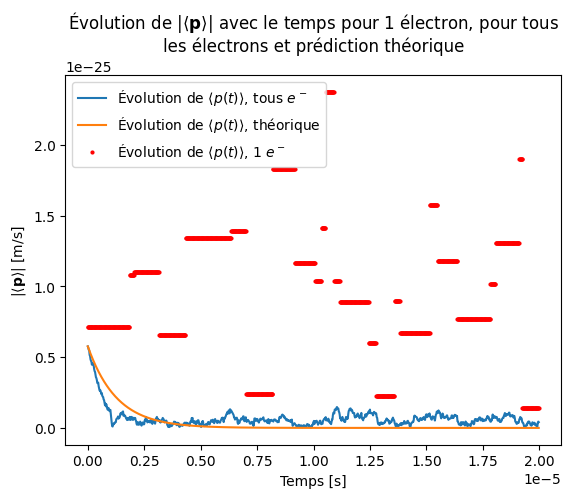

In [11]:
pTheory = np.linspace(0, (timeLoopLen-1)*dt, timeLoopLen)
pTheory[0] = pMoy[0] #première valeur pour permettre comparaison
for time in range(1, timeLoopLen):
    pTheory[time] = pMoy[0]*np.exp(-tVector[time]/tau)
plt.plot(tVector, pMoy, label=r'Évolution de $\langle p(t)\rangle$, tous $e^-$')
plt.plot(tVector, pTheory, label=r'Évolution de $\langle p(t)\rangle$, théorique')
plt.plot(tVector, pAnalysSphere, 'ro', markersize=2, label=r'Évolution de $\langle p(t)\rangle$, 1 $e^-$')
plt.xlabel("Temps [s]")
plt.ylabel(r"$|\langle \mathbf{p} \rangle|$ [m/s]")
plt.title(r"Évolution de $|\langle \mathbf{p} \rangle|$ avec le temps pour 1 électron, pour tous" + "\nles électrons et prédiction théorique")
plt.legend()
plt.show()
#

La figure ci-dessus montre bel et bien que la moyenne de quantité de mouvement, même si forcé initalement dans une direction aléatoire, revient vers une valeur nulle après un certain temps, tel que prédit par le modèle de Drude. Cependant, puisque les interactions avec les coeurs ioniques restent aléatoires, il est normal que la moyenne simulée n'atteinge jamais 0 et fluctue. De plus, il est normal que la quantité de mouvement d'une seule particule varie différement et de manière discontinue, changeant uniquement au moment d'une collision et restant à une quantité de mouvement non-nulle, en vertu de la distrbution de Maxwell-Boltzman.

### Dynamique sous l'effet d'une force externe ###

IX. _(10 points)_ &mdash; Pour passer de la cinétique à la dynamique des électrons libres, modifiez votre code de simulation en ajoutant une fonction qui applique un champ électrique uniforme. Celui-ci devra être de module ajustable et perpendiculaire à deux des côtés de la boîte. À chaque pas de temps $\mathrm{d}t$ sans collision, les électrons devront donc accélérer d'un incrément $\mathrm{d}p_x$ dicté par la force de Coulomb à leur position.

Copiez le code de votre fonction dans la cellule qui suit en n'oubliant pas d'inclure votre fichier Python (`.py`) modifié avec la simulation complète lors de la remise.

In [12]:
#Ligne ajoutée dans le script particule pour modifier p, 
#dans la fonction update de la classe Particule
#self.p += self.charge*E*vp.vector(1, 0, 0) #Le champ électrique est en x

%run TDS_2Ddrude_H24.py 5e-9 1 1
posMoy1 = deepcopy(posMoy)

<IPython.core.display.Javascript object>

### Question statistique ###

X. _(5 points)_ &mdash; Pour quelques différents modules de champ électrique, présentez graphiquement l'évolution de la position moyenne des électrons en fonction du temps pour ses deux composantes parallèle et perpendiculaire au champ.

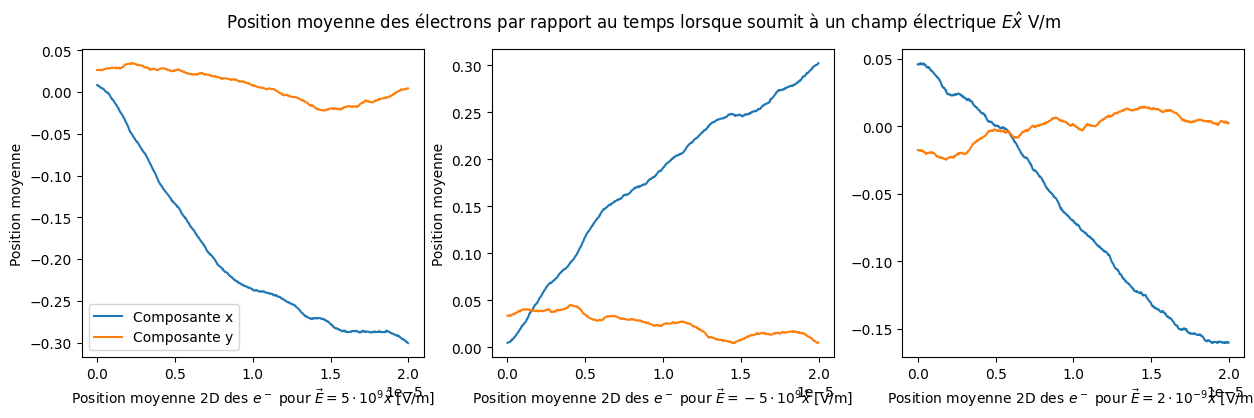

In [17]:
%run TDS_2Ddrude_H24.py -5e-9 1 0
posMoy2 = deepcopy(posMoy)
%run TDS_2Ddrude_H24.py 2e-9 1 0
posMoy3 = deepcopy(posMoy)

fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].plot(tVector,[pos.x for pos in posMoy1], label="Composante x")
axs[0].plot(tVector,[pos.y for pos in posMoy1], label="Composante y")

axs[1].plot(tVector, [pos.x for pos in posMoy2], label="Composante x")
axs[1].plot(tVector, [pos.y for pos in posMoy2], label="Composante y")

axs[2].plot(tVector, [pos.x for pos in posMoy3], label="Composante x")
axs[2].plot(tVector, [pos.y for pos in posMoy3], label="Composante y")

axs[0].set_xlabel(r"Position moyenne 2D des $e^-$ pour $\vec{E}=5\cdot10^9 \hat{x}$ [V/m]")
axs[1].set_xlabel(r"Position moyenne 2D des $e^-$ pour $\vec{E}=-5\cdot10^9 \hat{x}$ [V/m]")
axs[2].set_xlabel(r"Position moyenne 2D des $e^-$ pour $\vec{E}=2\cdot10^{-9} \hat{x}$ [V/m]")
[axs[i].set_ylabel("Position moyenne") for i in range(2)]
fig.suptitle(r"Position moyenne des électrons par rapport au temps lorsque soumit à un champ électrique $E \hat x$ V/m")
axs[0].legend()

Les graphiques ci-dessus montrent l'effet de la variation du champ électrique. La variation de la composante x est directement reliée à celle du champ électrique. La direction du déplacement converge avec la théorie (les électrons se déplacent en direction opposée au champ) et est à peu près proportionnelle à la grandeur du champ. Tous les graphiques montrent que la position moyenne en y demeure stable, toujours près de 0. Les légères variations peuvent être justifieées par la disposition des coeurs ioniques dans la simulation et par des fluctuations statistiques. 

# Médiagraphie #
- P. Drude, _Zur Elektronentheorie der Metalle; I Teil_, Annalen der Physik **306**(3), pp.566–613 (1900) https://doi.org/10.1002/andp.19003060312
- P. Drude, _Zur Elektronentheorie der Metalle; II Teil. Galvanomagnetische und Thermomagnetische Effecte_, Annalen der Physik **308**(11), pp.369–402 (1900) https://doi.org/10.1002/andp.19003081102
- P. Drude, _Zur Elektronentheorie der Metalle; Berichtigung_, Annalen der Physik **312**(3), pp.687–692 (1902) https://doi.org/10.1002/andp.19023120312
- H. A. Lorentz, _The Motion of Electrons in Metallic Bodies I_, Proc. of Koninklijke Akademie van Wetenschappen **7**, pp.438-453 (1905) https://dwc.knaw.nl/DL/publications/PU00013989.pdf
- H. A. Lorentz, _The Motion of Electrons in Metallic Bodies II_, Proc. of Koninklijke Akademie van Wetenschappen **7**, pp.585-593 (1905) https://dwc.knaw.nl/DL/publications/PU00014010.pdf
- H. A. Lorentz, _The Motion of Electrons in Metallic Bodies III_, Proc. of Koninklijke Akademie van Wetenschappen **7**, pp.684-691 (1905) https://dwc.knaw.nl/DL/publications/PU00014024.pdf
- La simulation utilise la librairie <a href="https://vpython.org">VPython</a> conçue pour faciliter la visualisation de physique en 3D, avec les instructions d’installation <a href="https://vpython.org/presentation2018/install.html">ici</a> et la documentation <a href="https://www.glowscript.org/docs/VPythonDocs/index.html">ici</a>. Le code adapte en 2D et commente en détail l’exemple <a href="https://www.glowscript.org/#/user/GlowScriptDemos/folder/Examples/program/HardSphereGas-VPython">HardSphereGas-VPython</a> du site interactif <a href="https://www.glowscript.org">GlowScript</a> pour programmer des animations avec VPython directement en ligne.